# Regresión Lineal Revisitada

![BLR](https://upload.wikimedia.org/wikipedia/commons/e/ed/Residuals_for_Linear_Regression_Fit.png)

> Anteriormente vimos que el estimador MAP, con previa Normal, para ajustar los parámetros $w\in\mathbb{R}^{d}$ de una función lineal $f(x) = x^T w$ a un conjunto de puntos $\{(x_i, y_i)\}_{i=1}^{N}$, con $x_i\in\mathbb{R}^{d}$ y $y_i\in\mathbb{R}$, tiene la forma de mínimos cuadrados regularizados.
>
> $$
  \hat{w}_{MAP} = \arg \min_{w} \left|\left|y - \Phi w\right|\right|^2 + \lambda \left|\left|w\right|\right|^2.
  $$

> Hoy usaremos ideas similares, y nos basaremos en la idea de previas conjugadas para estimar **la distribución posterior completa**, y extraer conclusiones adicionales a la estimación de los parámetros más probables.

> **Objetivos:**
> - Estudiar un enfoque Bayesiano sobre el problema de ajuste de una función lineal a un conjuto de datos.

> **Referencias:**
> 
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.

___
## 1. Planteamiento inicial

Una vez más, modelamos la relación entre las V.A. objetivo $y$, parámetros $w$, y datos de entrada $x$ de forma lineal, con incertidumbre aditiva Gaussiana:

$$
y = \phi(x)^T w + \epsilon,
$$

con $\epsilon \sim \mathcal{N}(0, \beta^{-1})$.

Como **no nos interesa modelar los datos, sino los parámetros**, estudiamos la distribución posterior $p(w | y, X)$, la cual se puede reescribir como:

$$
p(w | y, X) = \frac{p(y | X, w) p(w)}{p(y | X)} \qquad \text{($w \perp X$)}.
$$

La vez pasada, nos evitamos el problema de calcular la distribución posterior usando un estimador MAP para los parámetros, de la siguiente manera:

\begin{align} \nonumber
p(w | y, X)               & \propto p(y | X, w) p(w) \qquad \text{(La evidencia no depende de $w$)} \\ \nonumber
\arg \max_{w} p(w | y, X) & = \arg \max_{w} p(y | X, w) p(w).
\end{align}

Sin embargo, comentamos que aunque el estimador MAP posee características interesantes, sigue siendo un estimador puntual, lo que puede no ser suficiente dependiendo de la aplicación.

Durante esta sesión, estaremos modelando la distribución posterior completa, usando la idea de **distribuciones previas conjugadas**.

## 2. Previas conjugadas

Como antes, dado nuestor modelo, la función de verosimilitud $P(y | X, w)$ es una distribución normal de la forma:

$$
p(y | X, w) = \mathcal{N}(y | \Phi w, \beta^{-1} I) \propto \exp\left\{-\frac{\beta}{2} ||y - \Phi w||^2 \right\},
$$

Notemos que, para cualquier $w_0 \in \mathbb{R}^d$:

\begin{align} \nonumber
||y - \Phi w||^2 & = ||\Phi w - y||^2 \\ \nonumber
                 & = ||\Phi (w - w_0) + \Phi w_0 - y||^2 \\ \nonumber
                 & = \left(\Phi (w - w_0) + \Phi w_0 - y\right)^T \left(\Phi (w - w_0) + \Phi w_0 - y\right) \\ \nonumber
                 & = (w - w_0)^T \Phi^T \Phi (w - w_0) + 2 (w - w_0)^T \Phi^T (\Phi w_0 - y) + ||\Phi w_0- y||^2 
\end{align}


En particular, haciendo $w_0 = \hat{w}_{MLE} = \left(\Phi^T \Phi\right)^{-1} \Phi^T y$ (parámetros de máxima verosimilitud), se observa que:

$$
\begin{align} \nonumber
2 (w - \hat{w}_{MLE})^T \Phi^T (\Phi \hat{w}_{MLE} - y) & = 2 (\Phi w - \Phi \hat{w}_{MLE})^T  (\Phi \hat{w}_{MLE} - y) \\ \nonumber
                                    & = 2 \left[w^T \Phi^T \Phi \hat{w}_{MLE} - w^T \Phi^Ty - (\hat{w}_{MLE})^T \Phi^T \Phi \hat{w}_{MLE} + (\hat{w}_{MLE})^T \Phi^T y \right]\\ \nonumber
                                    & = 2 \left[w^T \underbrace{\Phi^T \Phi \left(\Phi^T \Phi\right)^{-1}}_{I} \Phi^T y - w^T \Phi^Ty - y^T \Phi \underbrace{\left(\Phi^T \Phi\right)^{-1} \Phi^T \Phi}_{I} \left(\Phi^T \Phi\right)^{-1} \Phi^T y + y^T \Phi \left(\Phi^T \Phi\right)^{-1} \Phi^T y\right] \\ \nonumber
                                    & = 2 \left[w^T \Phi^T y - w^T \Phi^Ty - y^T \Phi  \left(\Phi^T \Phi\right)^{-1} \Phi^T y + y^T \Phi \left(\Phi^T \Phi\right)^{-1} \Phi^T y\right] \\ \nonumber
                                    & = 0.                
\end{align}
$$

De esta manera: 

$$
||y - \Phi w||^2 = (w - \hat{w}_{MLE})^T \Phi^T \Phi (w - \hat{w}_{MLE}) + \underbrace{||\Phi \hat{w}_{MLE}- y||^2 }_{f(X, y)}
$$

Así, concluimos que

\begin{align} \nonumber
P(y | X, w) & = \mathcal{N}(y | X w, \sigma^2 I) \\ \nonumber
            & \propto \exp\left\{-\frac{\beta}{2} ||y - \Phi w||^2\right\} \\ \nonumber
            & \propto \exp\left\{-\frac{\beta}{2} (w - w^*)^T \Phi^T \Phi (w - w^*)\right\} \\ \nonumber
            & \propto \mathcal{N}\left(w | w^*, \beta^{-1} \left(\Phi^T \Phi\right)^{-1}\right)
\end{align}

#### La verosimilitud es proporcional a una distribución normal sobre los parámetros, con media igual al estimador por máxima verosimilitud

Retomando la distribución posterior, sabemos que

$$
P(w | X, y) \propto P(y | X, w) P(w) \propto \mathcal{N}\left(w | w^*, \beta^{-1} \left(\Phi^T \Phi\right)^{-1}\right) P(w).
$$

¿Qué elecciones de la distribución previa $P(w)$ son conjugadas?

#### Una distribución normal sobre $w$.

## 3. Previa normal

Como vimos en la tarea, el producto de dos densidades normales univariadas es otra densidad normal univariada. Esto se extiende al caso multivariable con:

$$
\mu_3 = \Sigma_2 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_1 + \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \mu_2, \qquad \Sigma_3 = \Sigma_1 \left(\Sigma_1 + \Sigma_2\right)^{-1} \Sigma_2.
$$

De manera que una previa conjugada para el caso anterior es:

$$
P(w) = \mathcal{N}(w | 0, \alpha^{-1} I),
$$

con lo cual:

$$
P(w | X, y) = \mathcal{N}\left(w | w^{**}, \Sigma^{*}\right).
$$

con

$$
\Sigma^{*} = \beta^{-1} \left(\Phi^T \Phi + \lambda I \right)^{-1}, \qquad w^{**} = \left(\Phi^T \Phi + \lambda I \right)^{-1} \Phi^T y = \hat{w}_{MAP}, 
$$


___

> **Comentario:** Para todo este análisis hemos supuesto los parámetros $\beta$ y $\alpha$ como valores deterministas conocidos. De no ser cierto esto, tendríamos que modelarlos como VA adicionales, y esto aumentaría un poco la complejidad del problema.
___

**Ejemplo:**

In [1]:
# Importar numpy 
import numpy as np
# Importar scipy.stats
from scipy import stats
# Importar matplotlib
from matplotlib import pyplot as plt
# Importar mpl_toolkits.mplot3d
from mpl_toolkits import mplot3d

/home/esteban/anaconda3/envs/stat-rethink2-pymc_v4/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Fijar semilla para reproducibilidad
np.random.seed(1001)
# Dispersión de los datos
sigma = 2
# Generar datos
N = 100
x = np.linspace(0, 10, N)
y = 2 * x + 5 + np.random.normal(loc=0, scale=sigma, size=N)

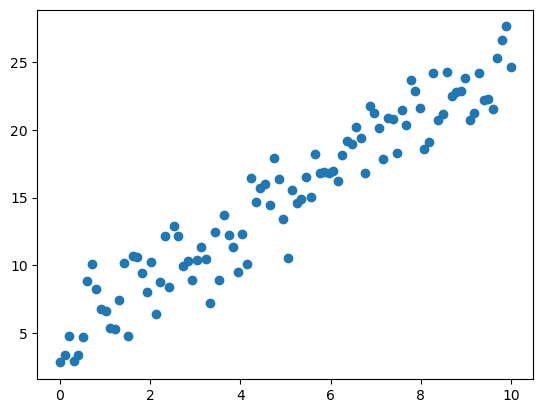

In [3]:
# Graficar
plt.plot(x, y, 'o')

En este caso, tenemos que el modelo es:

$$
y = \underbrace{[1\quad x]}_{\phi(x)^T} \left[\begin{array}{c} w_0 \\ w_1\end{array} \right] + \epsilon
$$

In [7]:
# Construimos Phi
Phi = np.hstack((
    np.ones((N, 1)),
    x.reshape(N, 1)
))
Phi[:5]

array([[1.       , 0.       ],
       [1.       , 0.1010101],
       [1.       , 0.2020202],
       [1.       , 0.3030303],
       [1.       , 0.4040404]])

De los datos, un valor plausible para $\alpha$ es: $\alpha=1$

In [13]:
# Beta y Alpha
beta = 1
alpha = 1
lambda_ = alpha / beta
# Distribución posterior
w_map = np.linalg.inv(Phi.T.dot(Phi) + lambda_ * np.eye(2)).dot(Phi.T).dot(y)
Sigma = np.linalg.inv(Phi.T.dot(Phi) + lambda_ * np.eye(2)) / beta
posterior = stats.multivariate_normal(
    mean=w_map,
    cov=Sigma
)

In [9]:
w_map

array([4.50504561, 2.08734787])

In [10]:
Sigma

array([[ 0.03788   , -0.00565176],
       [-0.00565176,  0.00114166]])

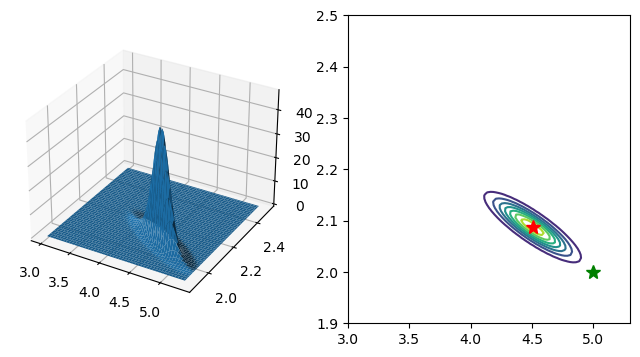

In [14]:
# Gráfico
w1 = np.linspace(3.0, 5.3, 100)
w2 = np.linspace(1.9, 2.5, 100)
w1, w2 = np.meshgrid(w1, w2)
z = posterior.pdf(np.dstack([w1, w2]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w1, w2, z)
ax2 = fig.add_subplot(122)
ax2.contour(w1, w2, z)
ax2.plot(w_map[0], w_map[1], '*r', ms=10)
ax2.plot(5, 2, '*g', ms=10)
plt.show()

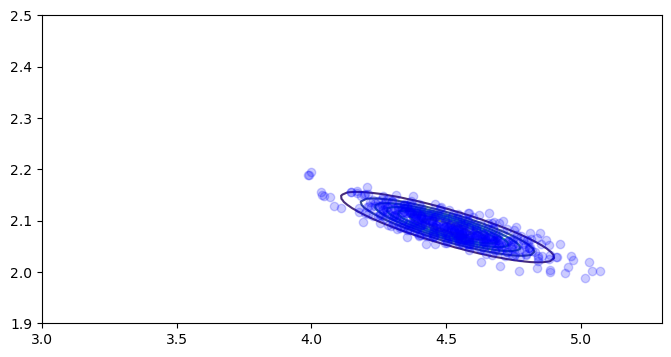

In [15]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax1.contour(w1, w2, z)
w_samples = posterior.rvs(size=500)
ax1.plot(w_samples[:, 0], w_samples[:, 1], 'ob', alpha=0.2)
plt.show()

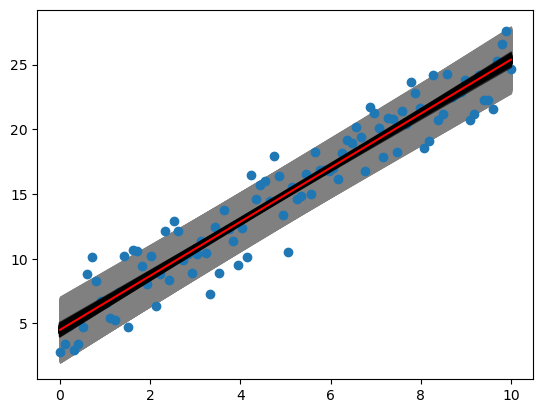

In [28]:
plt.plot(x, y, 'o')
for w_ in w_samples:
    plt.plot(x, w_[0] + w_[1] * x, 'k', alpha=0.3)
    plt.fill_between(
        x,
        w_[0] + w_[1] * x - 2 * beta,
        w_[0] + w_[1] * x + 2 * beta,
        color="gray"
    )
plt.plot(x, w_map[0] + w_map[1] * x, 'r')

In [31]:
predictions = []
for w_ in w_samples:
    predictions.append(w_[0] + w_[1] * 4)
predictions = np.array(predictions)

In [33]:
predictions.min() - 2 * beta, predictions.max() + 2 * beta

(10.584002520233913, 15.154595980868402)

#### ¿Qué pasa si el valor que usamos para $\sigma$ se desvía del valor real?

In [36]:
# Beta y Alpha
beta = 10
alpha = 1
lambda_ = alpha / beta
# Distribución posterior
w_map = np.linalg.inv(Phi.T.dot(Phi) + lambda_ * np.eye(2)).dot(Phi.T).dot(y)
Sigma = np.linalg.inv(Phi.T.dot(Phi) + lambda_ * np.eye(2)) / beta
posterior = stats.multivariate_normal(
    mean=w_map,
    cov=Sigma
)

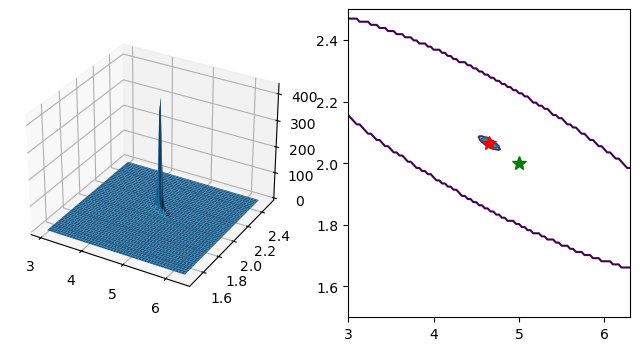

In [37]:
# Gráfico
w1 = np.linspace(3.0, 6.3, 100)
w2 = np.linspace(1.5, 2.5, 100)
w1, w2 = np.meshgrid(w1, w2)
z = posterior.pdf(np.dstack([w1, w2]))
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w1, w2, z)
ax2 = fig.add_subplot(122)
ax2.contour(w1, w2, z)
ax2.plot(w_map[0], w_map[1], '*r', ms=10)
ax2.plot(5, 2, '*g', ms=10)
plt.show()

### Aprendizaje en línea

Este esquema que acabamos de ver es susceptible para aprendizaje en línea. Dado que la distribución posterior es normal cuando la previa es normal (previa conjugada), podemos usar esta distribución posterior para el siguiente paso. La nueva previa para el siguiente paso sería:

$$
P_{k+1}(w) = P_{k}(w | X, y) = \mathcal{N}\left(w | \mu_k, \Sigma_k\right).
$$

**Tarea.** Dado que la función de verosimilitud satisface:

$$
P(y | X, w) \propto \mathcal{N}\left(w | w^*, \sigma^2 \left(X^T X\right)^{-1}\right),
$$

¿Cuál sería la distribución posterior con una previa normal $P(w)  = \mathcal{N}\left(w | \mu, \Sigma\right)$?

# Anuncios parroquiales

### Examen módulo 1. Martes 10 de Octubre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>